## Chapter 4 [Spectroscopy](Ch4-Spectroscopy.ipynb)


<hr style="height:1px;border-top:4px solid #FF8200" />

# Read photoabsorption data from NIST


part of 

## [Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)



by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with  electron microscopes


## Import the essential libraries

In [19]:
#import martplotlib and numpy with a magic comand
%pylab --no-import-all notebook

import pickle

Populating the interactive namespace from numpy and matplotlib


## Libraries to read web pages and parse them

In [ ]:
import io
import requests
from bs4 import BeautifulSoup

roman = ['0','I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII']

## Now we get the data for each atomic number

In [14]:
## define dictionary we put everything
tags = {}

## Main loop over atomic numbers (not higher than plutonium)
for i in range(1,93):
    Z = str(i)
    tags[i]= {}
    ## open web page
    page = requests.get(f"https://physics.nist.gov/cgi-bin/ffast/ffast.pl?Z={Z}&Formula=&gtype=4&range=S&lower=0.001&upper=100&density=");
    ## decode them 
    soup = BeautifulSoup(page.content, 'html.parser')
    ## get it as text
    buf = io.StringIO(soup.get_text())
    
    ## skip header
    while 'NIST' not in buf.readline(): pass
    
    #skip empty lines
    buffer = buf.readline().strip()
    while len(buffer)==0:
        buffer = buf.readline().strip()
    
    ## read meta data of element
    buffer = buffer.split()
    
    tags[i]['element'] = buffer[0]
    tags[i]['Z'] = buffer[-1].strip()[:-1]
    buffer = buf.readline()
    
    buffer = buf.readline().split()
    
    tags[i]['atomic_weight'] = float(buffer[0])
    tags[i]['nominal_density'] = float(buffer[-1])
    buffer = buf.readline()
    buffer = buf.readline().split()

    tags[i]['photoabs_to_sigma'] = float(buffer[-1])
    
    buffer = buf.readline().split()
    buffer = buf.readline().split()
    tags[i]['f2_to_eV'] = float(buffer[-1])
    buffer = buf.readline().split()
    
    while len(buffer)==0 :
        buffer = buf.readline().strip()
        
        if len(buffer)> 2:
            buffer = buffer.split()
            if len(buffer)> 2:
                
                if 'edge' not in  buffer[1]:
                    buffer = ''
    
    
    print(i,'number of edges', buffer[0])
    tags[i]['number_of_edges'] = int(buffer[0])
    tags[i]['edges'] = {}
    
    ## read absorption data 
    
    if tags[i]['number_of_edges'] == 1:
        
        tags[i]['edges']['K'] = float(buffer[-1])*1e3 # in eV
    else:
        number_of_edges = 0
        tags[i]['edges'] = {}
        if i == 84:
            buffer = buf.readline().split()
            buffer = buf.readline().split()
        while number_of_edges <= tags[i]['number_of_edges']-1:
            buffer = buf.readline().split()
            j = 0
            while j <len(buffer):
                if buffer[j] =='K':
                    j+=1
                    tags[i]['edges']['K']= float(buffer[j])*1e3 # in eV
                else:
                    name = buffer[j] + '-' + str(roman.index(buffer[j+1].replace("*", "")))
                    j +=2 
                    tags[i]['edges'][name]= float(buffer[j])*1e3 # in eV

                j+=1
                number_of_edges +=1
                if number_of_edges >= tags[i]['number_of_edges']:
                    number_of_edges+=10
                    break
    buffer = buf.readline().strip()
    
    ## skip stuff    
    while len(buffer)==0 :
        buffer = buf.readline().strip()
        if len(buffer)>2:
            
            buffer = buffer.split()   
            if buffer[0] != 'Form':
                buffer = ''
    buffer = buf.readline().split()
    buffer = buf.readline().split()
    buffer = buf.readline().split()
    #print(i, buffer)
    
    ## read data sets
    tags[i]['E'] = []
    tags[i]['f1'] = []
    tags[i]['f2'] = []
    tags[i]['photoabsorption'] = []
    tags[i]['coh+incoh'] = []
    tags[i]['total'] = []
    
    
    
    while len(buffer)>0:
        tags[i]['E'].append(float(buffer[0]))
        tags[i]['f1'].append(float(buffer[1]))
        tags[i]['f2'].append(float(buffer[2]))

        tags[i]['photoabsorption'].append(float(buffer[3]))
        tags[i]['coh+incoh'].append(float(buffer[4]))
        tags[i]['total'].append(float(buffer[5]))

        
        buffer = buf.readline().split()
    tags[i]['E'] = np.array(tags[i]['E'])*1e3 # in eV
    tags[i]['f1'] = np.array(tags[i]['f1'])
    tags[i]['f2'] = np.array(tags[i]['f2'])
    tags[i]['photoabsorption'] = np.array(tags[i]['photoabsorption'])
    tags[i]['coh+incoh'] = np.array(tags[i]['coh+incoh'])
    tags[i]['total'] = np.array(tags[i]['total'])
    print (i, tags[i]['edges'].keys())



1 number of edges 1
1 dict_keys(['K'])
2 number of edges 1
2 dict_keys(['K'])
3 number of edges 2
3 dict_keys(['K', 'L-1'])
4 number of edges 2
4 dict_keys(['K', 'L-1'])
5 number of edges 3
5 dict_keys(['K', 'L-1', 'L-2'])
6 number of edges 3
6 dict_keys(['K', 'L-1', 'L-2'])
7 number of edges 4
7 dict_keys(['K', 'L-1', 'L-2', 'L-3'])
8 number of edges 4
8 dict_keys(['K', 'L-1', 'L-2', 'L-3'])
9 number of edges 4
9 dict_keys(['K', 'L-1', 'L-2', 'L-3'])
10 number of edges 4
10 dict_keys(['K', 'L-1', 'L-2', 'L-3'])
11 number of edges 4
11 dict_keys(['K', 'L-1', 'L-2', 'L-3'])
12 number of edges 4
12 dict_keys(['K', 'L-1', 'L-2', 'L-3'])
13 number of edges 5
13 dict_keys(['K', 'L-1', 'L-2', 'L-3', 'M-1'])
14 number of edges 6
14 dict_keys(['K', 'L-1', 'L-2', 'L-3', 'M-1', 'M-2'])
15 number of edges 7
15 dict_keys(['K', 'L-1', 'L-2', 'L-3', 'M-1', 'M-2', 'M-3'])
16 number of edges 7
16 dict_keys(['K', 'L-1', 'L-2', 'L-3', 'M-1', 'M-2', 'M-3'])
17 number of edges 7
17 dict_keys(['K', 'L-1', 

74 number of edges 20
74 dict_keys(['K', 'L-1', 'L-2', 'L-3', 'M-1', 'M-2', 'M-3', 'M-4', 'M-5', 'N-1', 'N-2', 'N-3', 'N-4', 'N-5', 'N-6', 'N-7', 'O-1', 'O-2', 'O-3', 'O-4'])
75 number of edges 21
75 dict_keys(['K', 'L-1', 'L-2', 'L-3', 'M-1', 'M-2', 'M-3', 'M-4', 'M-5', 'N-1', 'N-2', 'N-3', 'N-4', 'N-5', 'N-6', 'N-7', 'O-1', 'O-2', 'O-3', 'O-4', 'O-5'])
76 number of edges 21
76 dict_keys(['K', 'L-1', 'L-2', 'L-3', 'M-1', 'M-2', 'M-3', 'M-4', 'M-5', 'N-1', 'N-2', 'N-3', 'N-4', 'N-5', 'N-6', 'N-7', 'O-1', 'O-2', 'O-3', 'O-4', 'O-5'])
77 number of edges 21
77 dict_keys(['K', 'L-1', 'L-2', 'L-3', 'M-1', 'M-2', 'M-3', 'M-4', 'M-5', 'N-1', 'N-2', 'N-3', 'N-4', 'N-5', 'N-6', 'N-7', 'O-1', 'O-2', 'O-3', 'O-4', 'O-5'])
78 number of edges 21
78 dict_keys(['K', 'L-1', 'L-2', 'L-3', 'M-1', 'M-2', 'M-3', 'M-4', 'M-5', 'N-1', 'N-2', 'N-3', 'N-4', 'N-5', 'N-6', 'N-7', 'O-1', 'O-2', 'O-3', 'O-4', 'O-5'])
79 number of edges 21
79 dict_keys(['K', 'L-1', 'L-2', 'L-3', 'M-1', 'M-2', 'M-3', 'M-4', 'M-5', 

<IPython.core.display.Javascript object>


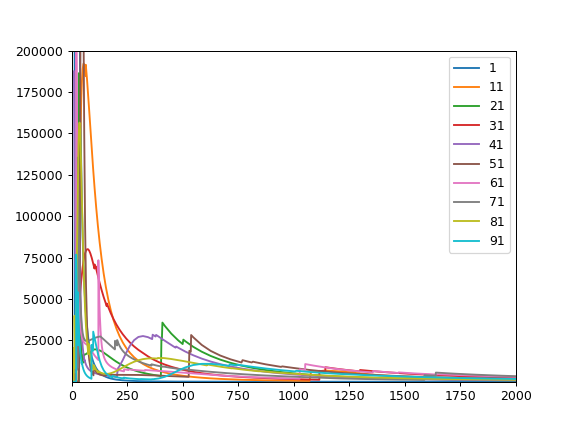

In [15]:
plt.figure()
for i in range(1,93,10):
    plt.plot(tags[i]['E'],tags[i]['photoabsorption'], label=str(i))
plt.legend()
plt.xlim(0,2000)
plt.ylim(2,2e5);

## Save tags dictionary in pickle file

In [16]:

output = open('ffast.pkl', 'wb')

# Pickle dictionary using protocol 0.
pickle.dump(tags, output)
output.close()

## Open pickle file
This is how we can now use the data

<IPython.core.display.Javascript object>


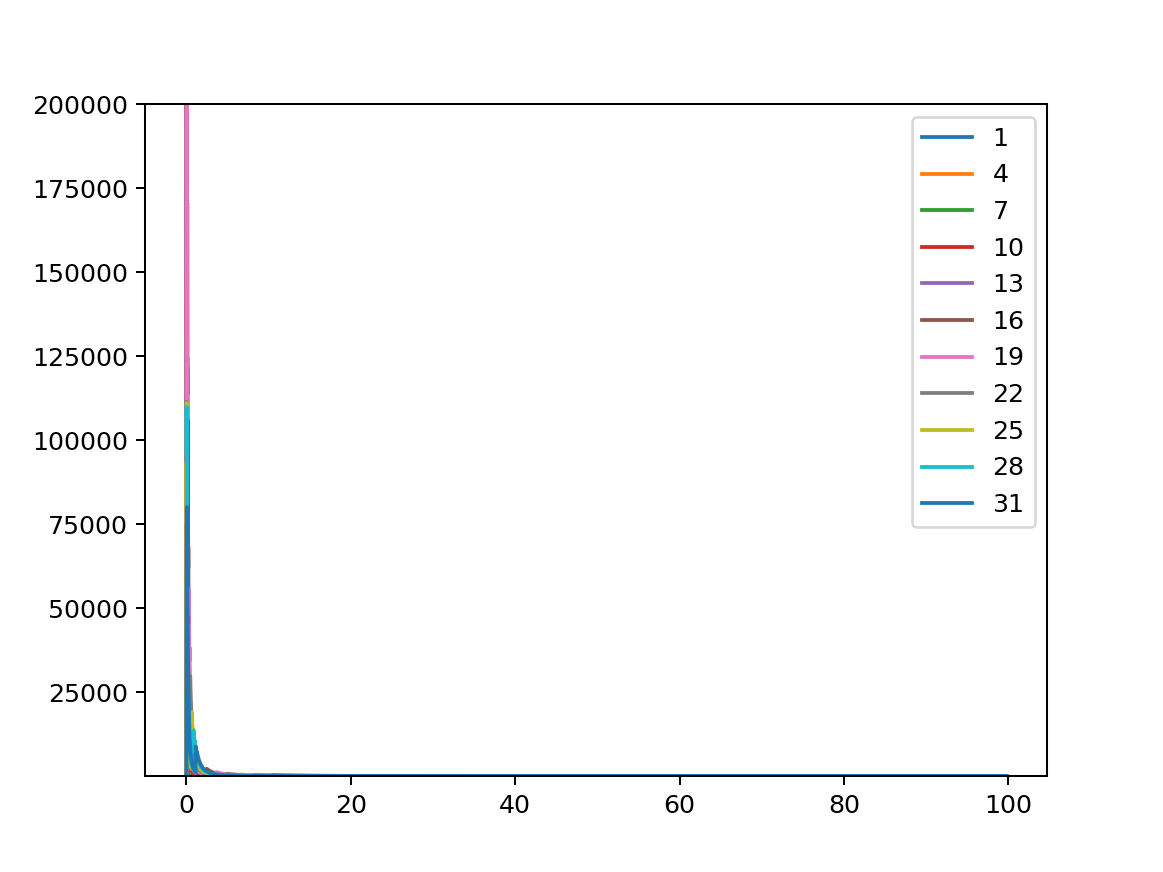

(2, 200000.0)

In [11]:
pkl_file = open('data/ffast.pkl', 'rb')
ffast = pickle.load(pkl_file)
pkl_file.close()
plt.figure()
for i in range(1,33,3):
    plt.plot(ffast[i]['E']/1000,ffast[i]['photoabsorption'], label=str(i))
plt.legend()
#plt.xlim(0,2000)
plt.ylim(2,2e5)

In [ ]:
## Open line weights file and store 

In [3]:
lineweights_file = open('data/lineweight.txt', encoding='utf8')

XrayLines = lineweights_file.readline().strip().split(',')
XrayLines[0] = XrayLines[0].replace('// ','')
tags = {}
print(XrayLines)
line = lineweights_file.readline().strip().split(',')
element = 0
line = ['1']
for element in range(1,95):
    tags[element] = {}
    tags[element]['lines'] ={}
    line = lineweights_file.readline().strip().split(',')
    #print(element,line)
    for i, line_weight in enumerate(line):
        #print(element,line_weight)
        if float(line_weight) > 0:
            
            tags[element]['lines'][XrayLines[i]] = {}
            tags[element]['lines'][XrayLines[i]]['weight'] = float(line_weight)
            


['K-L3', 'K-L2', 'K-M3', 'K-N3', 'K-M2', 'K-N5', 'K-M5', 'L3-N2', 'L3-N3', 'L3-O2', 'L3-O3', 'L3-P1', 'L3-M5', 'L3-M4', 'L3-N4', 'L3-N5', 'L3-O4', 'L3-N1', 'L3-O1', 'L3-M1', 'L3-M3', 'L3-M2', 'L3-N6', 'L2-M2', 'L2-M5', 'L2-N2', 'L2-N3', 'L2-N5', 'L2-O2', 'L2-O3', 'L2-P2', 'L2-M4', 'L2-M3', 'L2-N4', 'L2-N1', 'L2-O4', 'L2-O1', 'L2-M1', 'L2-N6', 'L1-M1', 'L1-N1', 'L1-N4', 'L1-O1', 'L1-O4', 'L1-M4', 'L1-M3', 'L1-M2', 'L1-M5', 'L1-N2', 'L1-N5', 'L1-N3', 'L1-O3', 'L1-O2', 'M1-N2', 'M1-N3', 'M2-M4', 'M2-N1', 'M2-N4', 'M2-O4', 'M3-M4', 'M3-M5', 'M3-N1', 'M3-N4', 'M3-O1', 'M3-O4', 'M3-O5', 'M3-N5', 'M4-N3', 'M4-O2', 'M4-N6', 'M4-N2', 'M5-O3', 'M5-N7', 'M5-N6', 'M5-N3', 'N4-N6', 'N5-N6']
1 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 

## Add Line Weights to ffast

In [18]:

for key in ffast:
    ffast[key]['lines'] = tags[key]['lines'].copy()
    
print(ffast[14].keys())
print(ffast[14]['lines'])



{'lines': {'K-L3': {'weight': 1.0}, 'K-L2': {'weight': 0.505}, 'K-M3': {'weight': 0.0593}, 'K-M2': {'weight': 0.0267}}}
dict_keys(['element', 'Z', 'atomic_weight', 'nominal_density', 'photoabs_to_sigma', 'f2_to_eV', 'number_of_edges', 'edges', 'E', 'f1', 'f2', 'photoabsorption', 'coh+incoh', 'total', 'lines'])
{'K-L3': {'weight': 1.0}, 'K-L2': {'weight': 0.505}, 'K-M3': {'weight': 0.0593}, 'K-M2': {'weight': 0.0267}}


## Calculate Line Positions

In [51]:
del_lines = []

for key in  ffast:
    for line in ffast[key]['lines']:
        [end,start] = line.split('-')
        start =  start[0]+'-'+start[1]
        if end !='K':
            end = end[0]+'-'+end[1]
        if start in ffast[key]['edges']: 
            ffast[key]['lines'][line]['position'] = ffast[key]['edges'][end]-ffast[key]['edges'][start]
        else:
            ffast[key]['lines'][line]
            del_lines.append([key,line])
for ll in del_lines:
    key,line = ll
    print('deleting: ',key,line, ffast[key]['lines'][line])

    del(ffast[key]['lines'][line])
print(key, ffast[key]['lines'])
    

92 {'K-L3': {'weight': 1.0, 'position': 98439.7}, 'K-L2': {'weight': 0.5, 'position': 94658.4}, 'K-M3': {'weight': 0.15, 'position': 111302.6}, 'K-N3': {'weight': 0.15, 'position': 114561.1}, 'K-M2': {'weight': 0.15, 'position': 110423.8}, 'K-N5': {'weight': 1e-05, 'position': 114868.3}, 'K-M5': {'weight': 0.0005, 'position': 112054.3}, 'L3-N2': {'weight': 0.0001, 'position': 15893.699999999999}, 'L3-N3': {'weight': 0.0001, 'position': 16121.4}, 'L3-O2': {'weight': 0.0001, 'position': 16907.0}, 'L3-O3': {'weight': 0.0001, 'position': 16971.2}, 'L3-P1': {'weight': 0.0001, 'position': 17095.6}, 'L3-M5': {'weight': 1.0, 'position': 13614.599999999999}, 'L3-M4': {'weight': 0.1137, 'position': 13438.699999999999}, 'L3-N4': {'weight': 1e-05, 'position': 16385.899999999998}, 'L3-N5': {'weight': 0.236, 'position': 16428.6}, 'L3-O4': {'weight': 0.08, 'position': 17061.3}, 'L3-N1': {'weight': 0.0175, 'position': 15725.5}, 'L3-O1': {'weight': 0.0004, 'position': 16842.6}, 'L3-M1': {'weight': 0.07

## Test

In [53]:
key= 14
print(f"lines of {ffast[key]['element']} :")
for line in ffast[key]['lines']:
      print(f"{line:5s}: at {ffast[key]['lines'][line]['position']:.2f} eV with weight {ffast[key]['lines'][line]['weight']} ")

lines of Si :
K-L3 : at 1739.70 eV with weight 1.0 
K-L2 : at 1739.70 eV with weight 0.505 
K-M2 : at 1833.82 eV with weight 0.0267 


## Save Data to pickel File

In [55]:
output = open('data/ffast.pkl', 'wb')

# Pickle dictionary using protocol 0.
pickle.dump(ffast, output)
output.close()

## Open pickle file
This is how we can now use the data

lines of Al :
K-L3 : at 1486.50 eV with weight 1.0 
K-L2 : at 1486.50 eV with weight 0.505 


<IPython.core.display.Javascript object>


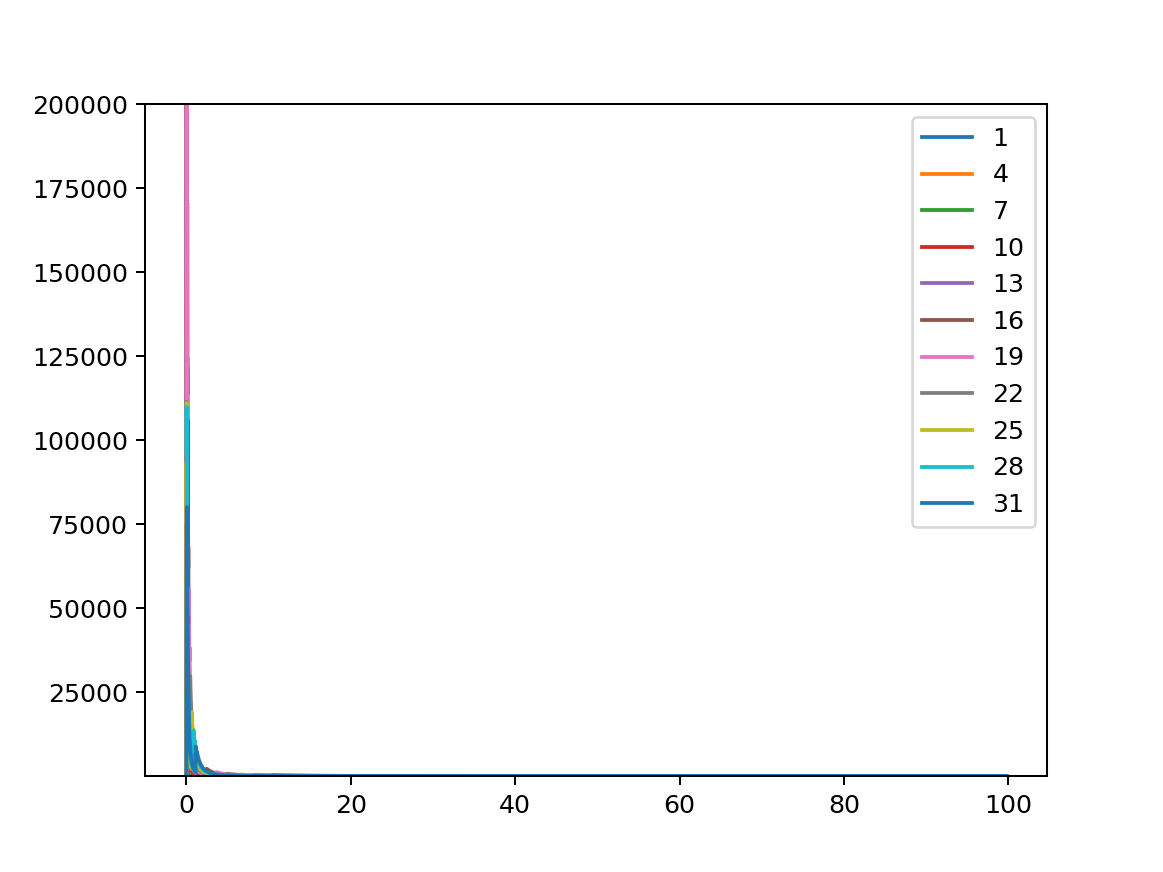

(2, 200000.0)

In [59]:

pkl_file = open('data/ffast.pkl', 'rb')
ffast = pickle.load(pkl_file)
pkl_file.close()
key= 13
print(f"lines of {ffast[key]['element']} :")
for line in ffast[key]['lines']:
      print(f"{line:5s}: at {ffast[key]['lines'][line]['position']:.2f} eV with weight {ffast[key]['lines'][line]['weight']} ")
            
plt.figure()
for i in range(1,33,3):
    plt.plot(ffast[i]['E']/1000,ffast[i]['photoabsorption'], label=str(i))
plt.legend()
#plt.xlim(0,2000)
plt.ylim(2,2e5)